In [57]:
import numpy
from matplotlib import pyplot
from scipy.constants import c

In [58]:
def window_function(u, u_0, sigma):
    return numpy.exp(-(u-u_0)**2.*sigma)

In [59]:
def averaged_window_function(u,u_offsets,sigma):
    offset_windows = numpy.array([window_function(u, u_i, sigma) for u_i in u_offsets])
    print(offset_windows.shape)
    
    averaged_window = numpy.mean(offset_windows, axis=0)
    print(averaged_window.shape)
    return averaged_window

In [60]:
def summed_window_function(u,u_offsets,sigma):
    offset_windows = numpy.array([window_function(u, u_i, sigma) for u_i in u_offsets])
    print(offset_windows.shape)
    
    summed_window = numpy.sum(offset_windows, axis=0)
    return summed_window

(4, 100)
(100,)
(4, 100)


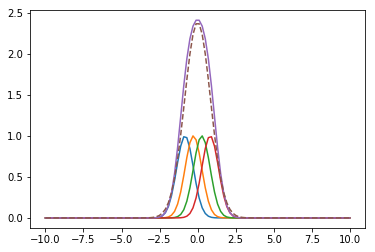

In [62]:
wavelength = 2.
x_coordinates = numpy.array([-1.5,-0.5,0.5,1.5])*1.1
u_offsets = x_coordinates/wavelength
width = (x_coordinates.max() - x_coordinates.min())/wavelength


u_coordinates = numpy.linspace(-10,10,100)

averaged_window = averaged_window_function(u_coordinates, u_offsets, width )
summed_window = summed_window_function(u_coordinates, u_offsets, width )



for offset in u_offsets:
    single = window_function(u_coordinates, offset, width)
    pyplot.plot(u_coordinates,single)

approximation = window_function(u_coordinates, 0, width*0.42)/0.42

#pyplot.plot(u_coordinates, averaged_window)
pyplot.plot(u_coordinates, summed_window)
pyplot.plot(u_coordinates, approximation, linestyle='--')

In [56]:
wavelength = 2.
x_coordinates = numpy.array([-1.5,-0.5,0.5,1.5])*1.1
u_offsets = x_coordinates/wavelength
width = (x_coordinates.max() - x_coordinates.min())/wavelength


u_coordinates = numpy.linspace(-10,10,100)



pyplot.plot(u_coordinates, window)



NameError: name 'window' is not defined

In [40]:
def beam_width(frequency, diameter= 4, epsilon = 1):
    return epsilon*c/(frequency*diameter)

In [33]:
class PointSourceSky:
    
    def __init__(self):
        self.flux_0 = None
        self.frequency_0 = None
        self.l_coordinate = None
        self.m_coordinate = None
        self.spectral_index = 0.8
        
        
    def add_source(self, flux, frequency_0 = 150e6, l_coordinate = 0, m_coordinate =0 , spectral_index=0.8):
        assert isinstance(flux, numpy.ndarray), "Please input a numpy array for flux"
        assert isinstance(frequency_0, numpy.ndarray), "Please input a numpy array for frequency"
        assert isinstance(l_coordinate, numpy.ndarray), "Please input a numpy array l coordinate"
        assert isinstance(m_coordinate, numpy.ndarray), "Please input a numpy array m coordinate"
        assert isinstance(spectral_index, numpy.ndarray), "Please input a numpy array spectral index"

        if self.flux_0 == None:
            self.flux_0 = flux
            self.frequency_0 = frequency_0
            self.l_coordinate = l_coordinate
            self.m_coordinate = m_coordinate
            self.spectral_index = spectral_index
        else:
            self.flux_0.append(flux)
            self.frequency_0.append(frequency_0)
            self.l_coordinate.append(l_coordinate)
            self.m_coordinate.append(m_coordinate)
            self.spectral_index.append(spectral_index)
        return
            
    

In [36]:
def visibility_model(u,v, frequency1, sources):
    visibilities = numpy.zeros(frequency1.shape, dtype=complex)
    nu_low = min(frequency1)
    for i in range(len(sources.flux_0)):
        source_l = sources.l_coordinate[i]
        source_m = sources.m_coordinate[i]
        
        beam_response = numpy.exp(-(sources.source_l**2. +  sources.m_coordinate[i]**2.)/beamwidth(frequency1))
        fourier_kernel= numpy.exp(-2*numpy.pi*1j*(source_l*u + source_m*v)*frequency1/nu_low)
        visibilities += sources.flux_0[i]*(frequency1/nu_low)**-0.8*beam_response*fourier_kernel
    return visibilities

def visibility_perturbation(u,v, frequency1, sources):
    perturbation = numpy.zeros(frequency1.shape, dtype=complex)
    nu_low = min(frequency1)
    for i in range(len(sources.flux_0)):
        source_l = sources.l_coordinate[i]
        source_m = sources.m_coordinate[i]
        beam_response = numpy.exp(-(sources.source_l**2. +  sources.m_coordinate[i]**2.)/beamwidth(frequency1))
        fourier_kernel= numpy.exp(-2*numpy.pi*1j*(source_l*u + source_m*v)*frequency1/nu_low)
        visibility = sources.flux_0[i]*(frequency1/nu_low)**-0.8*beam_response*fourier_kernel
        perturbation_phase = numpy.exp(2*numpy.pi*1j*sources.l_coordinate)
        perturbation += visibility*
    
def beam_covariance(u ,nu1, nu2 ,S_0 = 100, source_l = 0, spectral_index = 0.8 ):
    nu_low = numpy.min(nu1)
    dx = 1.1
    beam_1 = beam_width(nu1)
    beam_2 = beam_width(nu2)
    
    Sigma = (beam_1**2.+ beam_2**2.)/(beam_1*beam_2)
    
    
    
    source_flux = S_0*(nu1*nu2/nu_low**2.)**-spectral_index
    beam_attenuation = numpy.exp(-source_l**2.*Sigma)
    
    VdV = numpy.exp(-2*numpy.pi*1j*u*source_l/nu_low*(nu1-nu2))*numpy.exp(4*numpy.pi*1j*source_l/beam_2)*\
    ((numpy.exp(-2*numpy.pi*1j*source_l/beam_2) - 1)**2./(numpy.exp(2*numpy.pi*1j*dx*nu2*source_l/c) - 1)**2.)
    
    dVV = numpy.exp(2*numpy.pi*1j*u*source_l/nu_low*(nu1-nu2))*numpy.exp(-4*numpy.pi*1j*source_l/beam_1)*\
    ((numpy.exp(2*numpy.pi*1j*source_l/beam_1) - 1)**2./(numpy.exp(2*numpy.pi*1j*dx*nu1*source_l/c) - 1)**2.)
    
    C = source_l*beam_attenuation*(VdV + dVV)
    
    return C

In [37]:
flux = numpy.array([100])
frequency_0 = numpy.array([150e6])
source_l = numpy.array([0])
source_m = numpy.array([0])
spectral_index = numpy.array([0.8])


sky_model = PointSourceSky()
sky_model.add_source(flux, frequency_0, source_l, source_m, spectral_index)

In [53]:
u_eor = 50
frequencies = numpy.linspace(130, 160, 100)

ff1, ff2 = numpy.meshgrid(frequencies, frequencies)

covariance = beam_covariance(u_eor, ff1, ff2, source_l= 0.2)

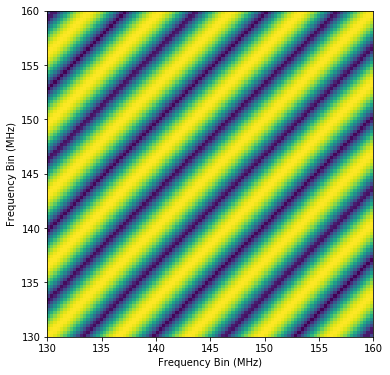

In [54]:
figure = pyplot.figure(figsize = (6,6))
covariance_plot = figure.add_subplot(111)
covariance_plot.pcolor(frequencies, frequencies,numpy.abs(covariance))
covariance_plot.set_xlabel('Frequency Bin (MHz)')
covariance_plot.set_ylabel('Frequency Bin (MHz)')


covariance_plot.set_aspect('equal')